Sentiment analysis information for:  askmen


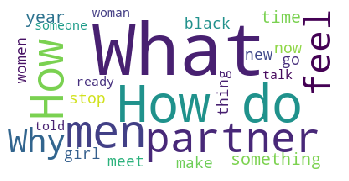

Final summarized counts:  [31, 14, 5]


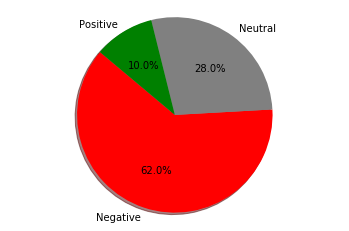

Sentiment analysis information for:  askwomen


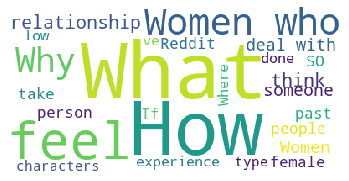

Final summarized counts:  [32, 10, 8]


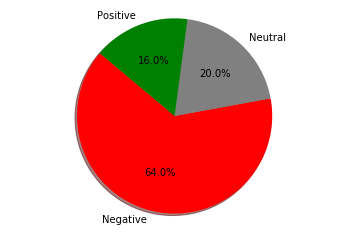

In [1]:
import pandas as pd
import praw
import nltk
import random
from pprint import pprint
reddit = praw.Reddit(user_agent='Comment Extraction (by /u/USERNAME)',client_id='jUFwehxO8tZRbw',client_secret="enter_your_secret",username='pumpkin_26', password='enter_your_pwd')
import praw
from textblob import TextBlob
import matplotlib.pyplot as plt


def subreddit_hot(subreddit):

    print('Sentiment analysis information for: ', subreddit)
    
    #     open new file and write in data
    with open('%s_hot.txt' % subreddit, 'a') as file:
        posts = subreddit.hot(limit=50)

    with open('%s_hot.txt' % subreddit, 'w') as file:
        for post in posts:
            file.write(post.title + '\n')
    
    with open('%s_hot.txt' % subreddit, 'r') as file:
        wordcloud_data = file.read()

# generate wordcloud        
    from wordcloud import WordCloud, STOPWORDS
    stopwords = set(STOPWORDS)
    stopwords.update(['It','This','be'])

    wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color='white').generate(wordcloud_data)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# print sentiment analysis overview
    with open('%s_hot.txt' % subreddit, 'r') as file:
        file_posts = file.readlines()
        
#         for posts in file_posts:
#             sentiment = TextBlob(posts)
#             print('{:40} : {: 01.2f} : {:01.2f}'.format(posts[:40], sentiment.polarity, sentiment.subjectivity))
            
            
    labels = ['Negative', 'Neutral', 'Positive']
    values = [0,0,0]

    
    for posts in file_posts:
        sentiment = TextBlob(posts)
        polarity = round((sentiment.polarity + 1) * 3) % 3
        values[polarity] = values[polarity] + 1
    
    print('Final summarized counts: ', values)

    colors = ['red','gray','green']
    plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
    
            
            
            

# Add subreddit here
subreddit_hot(reddit.subreddit('askmen'))
subreddit_hot(reddit.subreddit('askwomen'))










